## Apply Clustering on Custom Dataset

Use student marks/performance dataset.

In [1]:
import pandas as pd

df = pd.read_csv(
    "data/marksheet.csv", usecols=["Science", "English", "History", "Maths"]
)
df.head()

,Science,English,History,Maths
0,21,81,62,49
1,29,41,17,40
2,12,87,16,96
3,15,53,82,33
4,43,6,3,21


Apply K-Means clustering to categorize students.

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=99)
km_labels = kmeans.fit_predict(df)

In [3]:
from collections import Counter

cluster_labels = [f"Cluster {i}" for i in range(kmeans.n_clusters)]
label_counts = Counter(kmeans.labels_)

pd.DataFrame(sorted(label_counts.values()), columns=["Count"], index=cluster_labels)

,Count
Cluster 0,78
Cluster 1,84
Cluster 2,88


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

def visualize_clusters_2d(model, X, title="Cluster Visualization (PCA)"):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    labels = model.labels_

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=labels,
        palette="viridis",
        s=70,
        alpha=0.8
    )

    if hasattr(model, "cluster_centers_"):
        centroids_pca = pca.transform(model.cluster_centers_)
        plt.scatter(
            centroids_pca[:, 0],
            centroids_pca[:, 1],
            marker="X",
            s=200,
            color="black",
            label="Centroids",
            edgecolor="white",
            linewidth=1.5
        )

    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

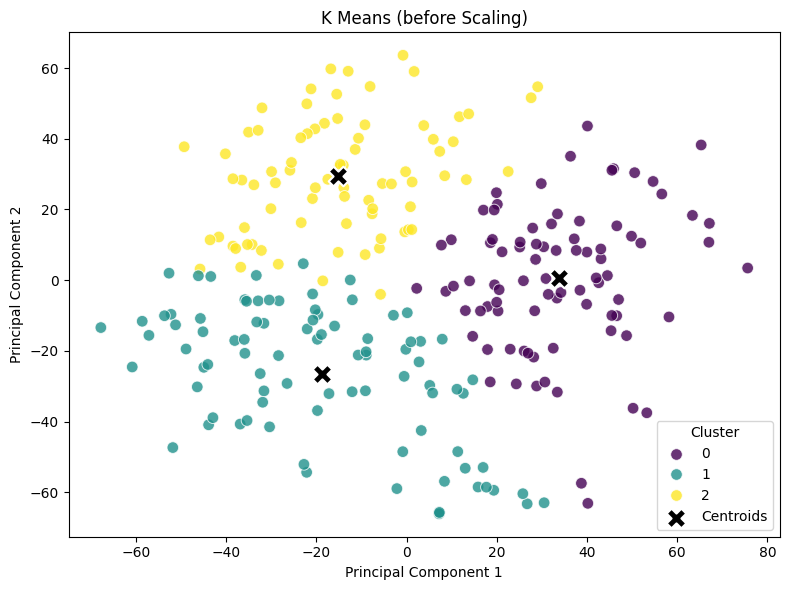

In [5]:
visualize_clusters_2d(kmeans, df.to_numpy(), "K Means (before Scaling)")

Perform data normalization/scaling before clustering.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.to_numpy())

In [7]:
kmeans1 = KMeans(n_clusters=3, random_state=99)
km_labels1 = kmeans1.fit_predict(X_scaled)

In [8]:
cluster_labels1 = [f"Cluster {i}" for i in range(kmeans1.n_clusters)]
label_counts1 = Counter(kmeans1.labels_)

pd.DataFrame(sorted(label_counts1.values()), columns=["Count"], index=cluster_labels1)

,Count
Cluster 0,60
Cluster 1,90
Cluster 2,100


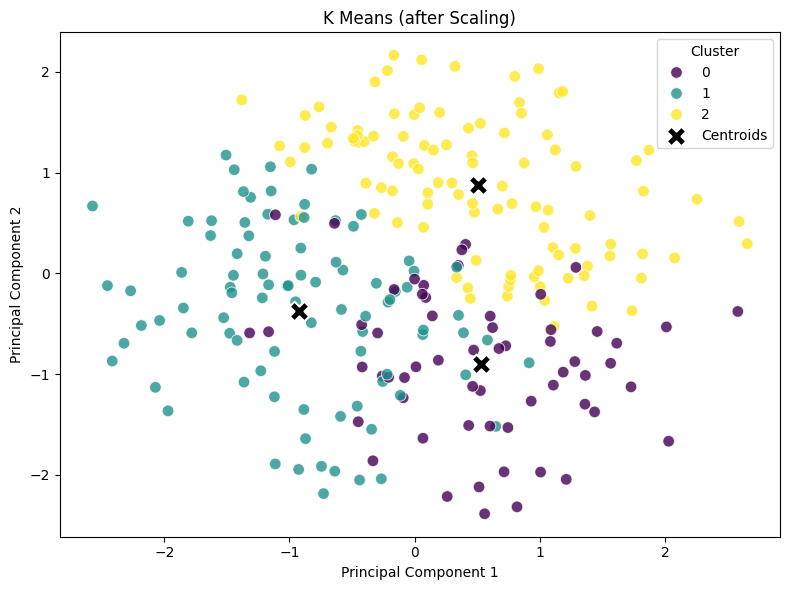

In [9]:
visualize_clusters_2d(kmeans1, X_scaled, "K Means (after Scaling)")